In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

config = tf.ConfigProto(
    gpu_options=tf.GPUOptions(
    allow_growth=True
    ))
data = pd.DataFrame()

In [2]:
'''
# Recovery action の入ったデータ

r_path = '../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/'
contents = os.listdir(r_path)
num = 0
for c in range(len(contents)):
    print(r_path+contents[c])
    n_data = pd.read_csv(r_path+contents[c],header=None)
    data = pd.concat([data,n_data])
'''

"\n# Recovery action の入ったデータ\n\nr_path = '../data/LOG_G/x1500-y-1100_fix_ball_robot_recovery_action/stable/'\ncontents = os.listdir(r_path)\nnum = 0\nfor c in range(len(contents)):\n    print(r_path+contents[c])\n    n_data = pd.read_csv(r_path+contents[c],header=None)\n    data = pd.concat([data,n_data])\n"

In [3]:
# ブレることなくボールをゴールに運んだデータ
r_path = '../data/LOG_G/fix_ball_robot/bk_stable/'
contents = os.listdir(r_path)
num = 0
for c in range(len(contents)):
    print(r_path+contents[c])
    n_data = pd.read_csv(r_path+contents[c],header=None)
    data = pd.concat([data,n_data])
d = data

../data/LOG_G/fix_ball_robot/bk_stable/log201808031448.csv
../data/LOG_G/fix_ball_robot/bk_stable/log201808031442.csv
../data/LOG_G/fix_ball_robot/bk_stable/log201808031431.csv
../data/LOG_G/fix_ball_robot/bk_stable/log201808031503.csv
../data/LOG_G/fix_ball_robot/bk_stable/log201808031429.csv
../data/LOG_G/fix_ball_robot/bk_stable/log201808031508.csv
../data/LOG_G/fix_ball_robot/bk_stable/log201808031618.csv


In [4]:
# ブレることなくボールをゴールに運んだデータをまとめたもの
'''
target_path = '/home/yota/workspace/Study/m1/data/LOG_G/ConvertData/convData.csv'
data = pd.read_csv(target_path,header=None)

print(data)
d = data
#print(ball)
#print(joy)
'''

"\ntarget_path = '/home/yota/workspace/Study/m1/data/LOG_G/ConvertData/convData.csv'\ndata = pd.read_csv(target_path,header=None)\n\nprint(data)\nd = data\n#print(ball)\n#print(joy)\n"

In [5]:
d.columns = ['l_bx','l_by','l_pole0x','l_pole0y','l_pole1x','l_pole1y','g_bx','g_by','g_pole0x','g_pole0y','g_pole1x','g_pole1y','g_px','g_py','g_pth','ljx','ljy','rjx','rjy']
#d = d[d.bx!=-1]

In [6]:
'''
from sklearn.cross_validation import train_test_split
t1 = []
t2 = []
def f1(x,y):
    return y * np.sin(x) + np.square(x)
def f2(x,y):
    return x * np.cos(y) + np.square(y)
for a in range(1000):
    r = np.array([np.random.rand(), np.random.rand()])
    t1.append(r)
    t2.append(np.array([ f1(r[0],r[1]),f2(r[0],r[1]) ]))
IN_train, IN_test, TAR_train, TAR_test = train_test_split(t1,t2,test_size=0.2,random_state=0)

IN_train = np.array(IN_train)
IN_test = np.array(IN_test)
TAR_train = np.array(TAR_train)
TAR_test = np.array(TAR_test)
print(IN_train[0])
print(IN_test[0])
print(TAR_train[0])
print(TAR_test[0])
print(f1(1,1))
print(f2(1,1))
'''

'\nfrom sklearn.cross_validation import train_test_split\nt1 = []\nt2 = []\ndef f1(x,y):\n    return y * np.sin(x) + np.square(x)\ndef f2(x,y):\n    return x * np.cos(y) + np.square(y)\nfor a in range(1000):\n    r = np.array([np.random.rand(), np.random.rand()])\n    t1.append(r)\n    t2.append(np.array([ f1(r[0],r[1]),f2(r[0],r[1]) ]))\nIN_train, IN_test, TAR_train, TAR_test = train_test_split(t1,t2,test_size=0.2,random_state=0)\n\nIN_train = np.array(IN_train)\nIN_test = np.array(IN_test)\nTAR_train = np.array(TAR_train)\nTAR_test = np.array(TAR_test)\nprint(IN_train[0])\nprint(IN_test[0])\nprint(TAR_train[0])\nprint(TAR_test[0])\nprint(f1(1,1))\nprint(f2(1,1))\n'

In [7]:
l_ball = np.array(d.iloc[:,0:2])   #  0, 1
l_pole0 = np.array(d.iloc[:,2:4])  #  2, 3
l_pole1 = np.array(d.iloc[:,4:6])  #  4, 5
g_ball = np.array(d.iloc[:,6:8])   #  6, 7
g_pole0 = np.array(d.iloc[:,8:10]) #  8, 9
g_pole1 = np.array(d.iloc[:,10:12])# 10,11
g_pos = np.array(d.iloc[:,12:15])  # 12,13,14
ljoy = np.array(d.iloc[:,15:17])   # 15,16
rjoy = np.array(d.iloc[:,17:19])   # 17,18

cl_goal = (l_pole0+l_pole1)/2
print(cl_goal)

[[4.80682232e+00 4.79768851e-03]
 [4.80682232e+00 4.79768851e-03]
 [4.80682232e+00 4.79768851e-03]
 ...
 [6.82373746e-01 3.80468028e-01]
 [6.80956847e-01 3.80922656e-01]
 [6.80956847e-01 3.80922656e-01]]


In [8]:
from sklearn.cross_validation import train_test_split

IN_size = 4
TAR_size = 3
'''
l_ball = np.array(d.iloc[:,0:2])   #  0, 1
l_pole0 = np.array(d.iloc[:,2:4])  #  2, 3
l_pole1 = np.array(d.iloc[:,4:6])  #  4, 5
g_ball = np.array(d.iloc[:,6:8])   #  6, 7
g_pole0 = np.array(d.iloc[:,8:10]) #  8, 9
g_pole1 = np.array(d.iloc[:,10:12])# 10,11
g_pos = np.array(d.iloc[:,12:15])  # 12,13,14
ljoy = np.array(d.iloc[:,15:17])   # 15,16
rjoy = np.array(d.iloc[:,17:19])   # 17,18

l_ball = np.array(d.iloc[:,0:2])   #  0, 1
lc_goal = np.array(d.iloc[:,2:4])  #  2, 3
g_ball = np.array(d.iloc[:,4:6])   #  4, 5
g_pole0 = np.array(d.iloc[:,6:8]) #  6, 7
g_pole1 = np.array(d.iloc[:,8:10])# 8,9
g_pos = np.array(d.iloc[:,10:13])  # 10,11,12
ljoy = np.array(d.iloc[:,13:15])   # 13,14
rjoy = np.array(d.iloc[:,15:17])   # 15,16
'''
input_d = np.c_[l_ball, cl_goal]
print(input_d)
output_d = np.array(d.iloc[:,15:18])
print(input_d.shape)
print(output_d.shape)



IN_train, IN_test, TAR_train, TAR_test = train_test_split(input_d,output_d,test_size=0.2,random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
#IN_train = IN_train/100.0
#IN_test = IN_test/100.0
for t in range(10):
    print(IN_train[t])
'''
print(IN_train[0])
print(IN_test[0])
print(TAR_train[0])
print(TAR_test[0])
'''

[[ 1.80832525e+00 -1.09913584e+00  4.80682232e+00  4.79768851e-03]
 [ 1.80832525e+00 -1.09913584e+00  4.80682232e+00  4.79768851e-03]
 [ 1.80832525e+00 -1.09913584e+00  4.80682232e+00  4.79768851e-03]
 ...
 [-4.00736687e+00  1.40364661e+00  6.82373746e-01  3.80468028e-01]
 [-4.01049517e+00  1.39623626e+00  6.80956847e-01  3.80922656e-01]
 [-4.01049517e+00  1.39623626e+00  6.80956847e-01  3.80922656e-01]]
(21714, 4)
(21714, 3)
[0.63581369 0.76178292 1.29293099 3.88862672]
[ 0.20742869 -0.03889046  1.32085872  0.29056216]
[ 1.75773686 -1.1892924   4.80517144 -0.22881521]
[ 0.55643458 -0.00447582  3.24540146  1.72133111]
[ 0.23227001 -0.10149225  1.05212761 -0.40835545]
[0.9169682  0.23234406 2.2435164  3.13909917]
[1.12903056 0.4470854  2.23449822 3.44489999]
[0.53571994 0.18975808 3.41401295 1.57697917]
[0.81217943 0.29773101 1.53834842 2.27932229]
[0.52463244 0.09685213 1.4116844  0.40784113]


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'\nprint(IN_train[0])\nprint(IN_test[0])\nprint(TAR_train[0])\nprint(TAR_test[0])\n'

In [9]:
#　初期化
sess = tf.Session(config=config)
test_sess = tf.Session(config=config)

INPUT = tf.placeholder(shape=[None, IN_size], dtype=tf.float32)
TARGET = tf.placeholder(shape=[None, TAR_size], dtype=tf.float32)

In [10]:
#hidden_size = [100]
hidden_size = [30,8]
batch_size = 100
iter_size = 200000

#　隠れ層の作成 （last layerに直結）
weights = []
biases = []
layers = []
tmp_size = IN_size
last_layer = INPUT
for hsize in hidden_size:
    weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, hsize])))
    biases.append(tf.Variable(tf.random_normal(shape=[hsize])))
    layers.append(tf.nn.relu(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))) # 活性化関数
    tmp_size = hsize
    last_layer = layers[-1]
    print(layers[-1])
#　出力層
weights.append(tf.Variable(tf.random_normal(shape=[tmp_size, TAR_size])))
biases.append(tf.Variable(tf.random_normal(shape=[TAR_size])))
layers.append(tf.add(tf.matmul(last_layer, weights[-1]), biases[-1]))
final_output = layers[-1]
print(final_output)

Tensor("Relu:0", shape=(?, 30), dtype=float32)
Tensor("Relu_1:0", shape=(?, 8), dtype=float32)
Tensor("Add_2:0", shape=(?, 3), dtype=float32)


In [11]:
#　学習
loss = tf.losses.mean_squared_error(TARGET,final_output)
test_loss = tf.losses.mean_squared_error(TARGET,final_output)
opt = tf.train.AdamOptimizer(0.001)
#opt = tf.train.GradientDescentOptimizer(0.01)
train_step = opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)
test_sess.run(init)
loss_vec=[]
test_loss_vec=[]
for i in range(iter_size):
    train_rand_index = np.random.choice(len(IN_train), size=batch_size,replace=False)
    train_rand_in = IN_train[train_rand_index]
    train_rand_tar = TAR_train[train_rand_index]
    sess.run(train_step, feed_dict={INPUT:train_rand_in, TARGET: train_rand_tar})
    loss_vec.append(sess.run(loss, feed_dict={INPUT:train_rand_in, TARGET: train_rand_tar}))
    
    test_rand_index = np.random.choice(len(IN_test), size=batch_size,replace=False)
    test_rand_in = IN_test[test_rand_index]
    test_rand_tar = TAR_test[test_rand_index]
    test_sess.run(train_step, feed_dict={INPUT:test_rand_in, TARGET: test_rand_tar})
    test_loss_vec.append(test_sess.run(test_loss, feed_dict={INPUT:test_rand_in, TARGET: test_rand_tar}))
    
    if (i+1)%100==0:
#        print(sess.run(INPUT, feed_dict={INPUT:rand_in, TARGET: rand_tar}))
        print('Generation:'+str(i+1)+', Loss = '+str(loss_vec[-1]))

Generation:100, Loss = 120.51164
Generation:200, Loss = 31.556715
Generation:300, Loss = 18.76957
Generation:400, Loss = 9.984804
Generation:500, Loss = 8.84497
Generation:600, Loss = 5.3057237
Generation:700, Loss = 4.6165833
Generation:800, Loss = 3.9249516
Generation:900, Loss = 2.4630208
Generation:1000, Loss = 2.4254258
Generation:1100, Loss = 4.4242706
Generation:1200, Loss = 2.068846
Generation:1300, Loss = 1.5940689
Generation:1400, Loss = 1.3460723
Generation:1500, Loss = 1.6751359
Generation:1600, Loss = 1.08309
Generation:1700, Loss = 1.0966275
Generation:1800, Loss = 0.87561536
Generation:1900, Loss = 0.8013796
Generation:2000, Loss = 0.7809678
Generation:2100, Loss = 1.270543
Generation:2200, Loss = 0.58868325
Generation:2300, Loss = 0.4997372
Generation:2400, Loss = 0.55730134
Generation:2500, Loss = 0.36779922
Generation:2600, Loss = 0.3830323
Generation:2700, Loss = 0.35841238
Generation:2800, Loss = 0.34974366
Generation:2900, Loss = 0.27076817
Generation:3000, Loss = 

Generation:23100, Loss = 0.065470956
Generation:23200, Loss = 0.059122227
Generation:23300, Loss = 0.06483301
Generation:23400, Loss = 0.05999155
Generation:23500, Loss = 0.05324887
Generation:23600, Loss = 0.060524993
Generation:23700, Loss = 0.06910688
Generation:23800, Loss = 0.05928734
Generation:23900, Loss = 0.06425827
Generation:24000, Loss = 0.06859887
Generation:24100, Loss = 0.06269279
Generation:24200, Loss = 0.052026868
Generation:24300, Loss = 0.073252484
Generation:24400, Loss = 0.056860458
Generation:24500, Loss = 0.05028915
Generation:24600, Loss = 0.06595982
Generation:24700, Loss = 0.056052316
Generation:24800, Loss = 0.06198321
Generation:24900, Loss = 0.059645537
Generation:25000, Loss = 0.060361773
Generation:25100, Loss = 0.059564672
Generation:25200, Loss = 0.06152546
Generation:25300, Loss = 0.059517376
Generation:25400, Loss = 0.057133533
Generation:25500, Loss = 0.0568156
Generation:25600, Loss = 0.055903614
Generation:25700, Loss = 0.07076266
Generation:25800

Generation:45600, Loss = 0.06267166
Generation:45700, Loss = 0.042898644
Generation:45800, Loss = 0.05946709
Generation:45900, Loss = 0.05375263
Generation:46000, Loss = 0.048529565
Generation:46100, Loss = 0.04491172
Generation:46200, Loss = 0.052562572
Generation:46300, Loss = 0.052098125
Generation:46400, Loss = 0.047453973
Generation:46500, Loss = 0.064915694
Generation:46600, Loss = 0.042645797
Generation:46700, Loss = 0.04777529
Generation:46800, Loss = 0.06073608
Generation:46900, Loss = 0.049792152
Generation:47000, Loss = 0.050087363
Generation:47100, Loss = 0.052604344
Generation:47200, Loss = 0.045284476
Generation:47300, Loss = 0.041113842
Generation:47400, Loss = 0.06348622
Generation:47500, Loss = 0.054667212
Generation:47600, Loss = 0.055142045
Generation:47700, Loss = 0.057924613
Generation:47800, Loss = 0.043554276
Generation:47900, Loss = 0.051399633
Generation:48000, Loss = 0.039989345
Generation:48100, Loss = 0.050103627
Generation:48200, Loss = 0.051296663
Generati

Generation:68000, Loss = 0.053113833
Generation:68100, Loss = 0.049080655
Generation:68200, Loss = 0.052050702
Generation:68300, Loss = 0.043038532
Generation:68400, Loss = 0.048161868
Generation:68500, Loss = 0.048410956
Generation:68600, Loss = 0.05148552
Generation:68700, Loss = 0.04532066
Generation:68800, Loss = 0.05009811
Generation:68900, Loss = 0.051889125
Generation:69000, Loss = 0.055522665
Generation:69100, Loss = 0.054206796
Generation:69200, Loss = 0.043038838
Generation:69300, Loss = 0.047678307
Generation:69400, Loss = 0.05601804
Generation:69500, Loss = 0.043156933
Generation:69600, Loss = 0.047266323
Generation:69700, Loss = 0.05214289
Generation:69800, Loss = 0.051281996
Generation:69900, Loss = 0.037372205
Generation:70000, Loss = 0.044998325
Generation:70100, Loss = 0.054075267
Generation:70200, Loss = 0.050147656
Generation:70300, Loss = 0.037934747
Generation:70400, Loss = 0.042745307
Generation:70500, Loss = 0.052459046
Generation:70600, Loss = 0.053810623
Genera

Generation:90400, Loss = 0.045842703
Generation:90500, Loss = 0.04428918
Generation:90600, Loss = 0.05415983
Generation:90700, Loss = 0.05240916
Generation:90800, Loss = 0.047369123
Generation:90900, Loss = 0.040417098
Generation:91000, Loss = 0.049839463
Generation:91100, Loss = 0.043382287
Generation:91200, Loss = 0.044787183
Generation:91300, Loss = 0.039240476
Generation:91400, Loss = 0.039998412
Generation:91500, Loss = 0.04951118
Generation:91600, Loss = 0.050032247
Generation:91700, Loss = 0.039215572
Generation:91800, Loss = 0.04689844
Generation:91900, Loss = 0.046894025
Generation:92000, Loss = 0.04980433
Generation:92100, Loss = 0.04428006
Generation:92200, Loss = 0.045733776
Generation:92300, Loss = 0.043353632
Generation:92400, Loss = 0.045838226
Generation:92500, Loss = 0.046714295
Generation:92600, Loss = 0.04495717
Generation:92700, Loss = 0.047346972
Generation:92800, Loss = 0.045648757
Generation:92900, Loss = 0.042353272
Generation:93000, Loss = 0.041384272
Generatio

Generation:112500, Loss = 0.041748323
Generation:112600, Loss = 0.05245997
Generation:112700, Loss = 0.04153951
Generation:112800, Loss = 0.044934057
Generation:112900, Loss = 0.047345635
Generation:113000, Loss = 0.039801802
Generation:113100, Loss = 0.040232874
Generation:113200, Loss = 0.046163514
Generation:113300, Loss = 0.05221327
Generation:113400, Loss = 0.0400226
Generation:113500, Loss = 0.0429716
Generation:113600, Loss = 0.0407348
Generation:113700, Loss = 0.044657458
Generation:113800, Loss = 0.03896346
Generation:113900, Loss = 0.04359838
Generation:114000, Loss = 0.04569045
Generation:114100, Loss = 0.05016073
Generation:114200, Loss = 0.040746976
Generation:114300, Loss = 0.040546242
Generation:114400, Loss = 0.04524111
Generation:114500, Loss = 0.045635514
Generation:114600, Loss = 0.040823046
Generation:114700, Loss = 0.05293258
Generation:114800, Loss = 0.042905744
Generation:114900, Loss = 0.03541308
Generation:115000, Loss = 0.046168964
Generation:115100, Loss = 0.

Generation:134400, Loss = 0.038724467
Generation:134500, Loss = 0.04254284
Generation:134600, Loss = 0.051419947
Generation:134700, Loss = 0.04356071
Generation:134800, Loss = 0.04869116
Generation:134900, Loss = 0.044136476
Generation:135000, Loss = 0.044389244
Generation:135100, Loss = 0.053256568
Generation:135200, Loss = 0.039356913
Generation:135300, Loss = 0.041142877
Generation:135400, Loss = 0.04336733
Generation:135500, Loss = 0.0457631
Generation:135600, Loss = 0.050639078
Generation:135700, Loss = 0.03936669
Generation:135800, Loss = 0.049812984
Generation:135900, Loss = 0.043851726
Generation:136000, Loss = 0.04597109
Generation:136100, Loss = 0.033917025
Generation:136200, Loss = 0.047655206
Generation:136300, Loss = 0.04469304
Generation:136400, Loss = 0.047005348
Generation:136500, Loss = 0.04274974
Generation:136600, Loss = 0.046517793
Generation:136700, Loss = 0.04111811
Generation:136800, Loss = 0.033353906
Generation:136900, Loss = 0.04678196
Generation:137000, Loss 

Generation:156300, Loss = 0.04085923
Generation:156400, Loss = 0.04032141
Generation:156500, Loss = 0.049524512
Generation:156600, Loss = 0.040985316
Generation:156700, Loss = 0.039956957
Generation:156800, Loss = 0.041190505
Generation:156900, Loss = 0.04501264
Generation:157000, Loss = 0.045613177
Generation:157100, Loss = 0.042569257
Generation:157200, Loss = 0.038137212
Generation:157300, Loss = 0.043551367
Generation:157400, Loss = 0.052752376
Generation:157500, Loss = 0.0471011
Generation:157600, Loss = 0.03920753
Generation:157700, Loss = 0.033464637
Generation:157800, Loss = 0.04333237
Generation:157900, Loss = 0.04384516
Generation:158000, Loss = 0.040386908
Generation:158100, Loss = 0.043362435
Generation:158200, Loss = 0.040404767
Generation:158300, Loss = 0.038821574
Generation:158400, Loss = 0.0403252
Generation:158500, Loss = 0.044985194
Generation:158600, Loss = 0.04251569
Generation:158700, Loss = 0.039882455
Generation:158800, Loss = 0.045689754
Generation:158900, Loss

Generation:178200, Loss = 0.037278634
Generation:178300, Loss = 0.040144265
Generation:178400, Loss = 0.042536065
Generation:178500, Loss = 0.040526193
Generation:178600, Loss = 0.04042021
Generation:178700, Loss = 0.040996686
Generation:178800, Loss = 0.043138385
Generation:178900, Loss = 0.046712734
Generation:179000, Loss = 0.04631391
Generation:179100, Loss = 0.03783575
Generation:179200, Loss = 0.045632776
Generation:179300, Loss = 0.04187518
Generation:179400, Loss = 0.04429954
Generation:179500, Loss = 0.041801054
Generation:179600, Loss = 0.047132876
Generation:179700, Loss = 0.042829543
Generation:179800, Loss = 0.040727105
Generation:179900, Loss = 0.043179948
Generation:180000, Loss = 0.044248454
Generation:180100, Loss = 0.046289004
Generation:180200, Loss = 0.044982217
Generation:180300, Loss = 0.04310364
Generation:180400, Loss = 0.041593518
Generation:180500, Loss = 0.036637988
Generation:180600, Loss = 0.05116491
Generation:180700, Loss = 0.043618254
Generation:180800, 

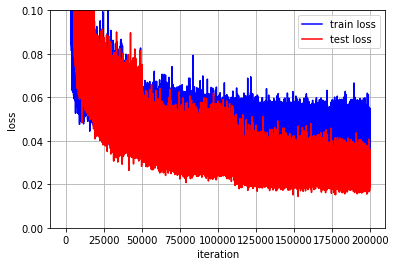

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid()
plt.plot(loss_vec,c='b',linestyle='solid',label='train loss')
plt.plot(test_loss_vec,c='r',label='test loss')

#plt.xlim(60000,60100)
plt.ylim(0,0.1)
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.savefig(str(hidden_size)+'.png')
plt.legend()


#print(test_loss_vec[99999])
#print(test_loss_vec[99999])

In [13]:
# 重みの保存
saver = tf.train.Saver()
saver.save(sess, './model.ckpt')


'./model.ckpt'

In [14]:
'''
# ボール座標とスティックの傾きプロット
by_max=IN_train.max(axis=0)[1]
by_min=IN_train.min(axis=0)[1]

ball_y = np.array(range(int(by_min)-3,int(by_max)+3))
for i in range(len(ball_y)):
    
    ball = np.array([[6.0, ball_y[i]/10.0]])
    
    print(ball)
    joy = sess.run(final_output, feed_dict={INPUT: ball})
    plt.scatter(ball[0][1],ball[0][0], s=200, c='orange')
    
    plt.quiver(0,0,-joy[0][0],-joy[0][1],angles="xy",scale_units="xy",scale=1)
    #plt.quiver(0,0,-0.6,5,angles="xy",scale_units="xy",scale=1)
    print(joy)
    plt.savefig(str(hidden_size)+'_img'+'.png')
    '''

'\n# ボール座標とスティックの傾きプロット\nby_max=IN_train.max(axis=0)[1]\nby_min=IN_train.min(axis=0)[1]\n\nball_y = np.array(range(int(by_min)-3,int(by_max)+3))\nfor i in range(len(ball_y)):\n    \n    ball = np.array([[6.0, ball_y[i]/10.0]])\n    \n    print(ball)\n    joy = sess.run(final_output, feed_dict={INPUT: ball})\n    plt.scatter(ball[0][1],ball[0][0], s=200, c=\'orange\')\n    \n    plt.quiver(0,0,-joy[0][0],-joy[0][1],angles="xy",scale_units="xy",scale=1)\n    #plt.quiver(0,0,-0.6,5,angles="xy",scale_units="xy",scale=1)\n    print(joy)\n    plt.savefig(str(hidden_size)+\'_img\'+\'.png\')\n    '

In [15]:
# 重みのrestore
predicts_sess = tf.Session(config=config)
ckpt = tf.train.get_checkpoint_state('./')
if ckpt == None:
    print('!!!!!!!WEIGHTS NOT FOUND!!!!!!')

saver.restore(predicts_sess, './model.ckpt')

INFO:tensorflow:Restoring parameters from ./model.ckpt
